<a href="https://colab.research.google.com/github/alex-riz-NE/hw2-vaccines2/blob/main/Copy_of_05_statsmodels_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05 -- Statsmodels exercises

Uses statsmodels for linear regression of the advertising dataset -- reproduces results in ISLR

Advertising dataset -- https://www.statlearning.com/s/Advertising.csv


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [ ]:
np.random.seed(9876789)


## Exercise 1 -- Table 3.1 (p68): univariate sales on TV

* Adapt the statsmodels OLS-estimation demo to reproduce Table 3.1 (p68) of ISLR2
* [OLS-estimation](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html#OLS-estimation) demo
* The example on the main page of statsmodels.org uses an R-style DSL (Domain Specific Language)


In [ ]:
adv = pd.read_csv("/content/Advertising.csv")

In [ ]:
adv
X=adv["TV"]
nsample = adv.shape[0]
# beta = np.array([1, 0.1, 10])
# e = np.random.normal(size=nsample)

X = sm.add_constant(X)
y = adv["sales"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary2())


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.610    
Dependent Variable: sales            AIC:                1042.0913
Date:               2023-02-08 02:07 BIC:                1048.6880
No. Observations:   200              Log-Likelihood:     -519.05  
Df Model:           1                F-statistic:        312.1    
Df Residuals:       198              Prob (F-statistic): 1.47e-42 
R-squared:          0.612            Scale:              10.619   
---------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const     7.0326      0.4578    15.3603    0.0000    6.1297    7.9355
TV        0.0475      0.0027    17.6676    0.0000    0.0422    0.0528
------------------------------------------------------------------
Omnibus:              0.531         Durbin-Watson:           1.93

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
A=np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))


<F test: F=array([[312.14499437]]), p=1.4673897001946677e-42, df_denom=198, df_num=1>


In [ ]:
print(results.fvalue)
print(np.sqrt(results.mse_resid))
print(results.rsquared)

312.1449943727128
3.258656368650463
0.611875050850071


In [ ]:
yhat

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Name: TV, Length: 200, dtype: float64

Text(0, 0.5, 'Sales')

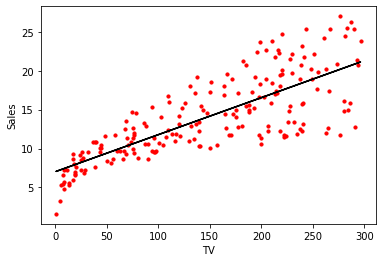

In [ ]:
yhat=results.params[1]*X['TV']+ results.params[0]
plt.scatter(X['TV'], y, c='r', s=10)
plt.plot(X['TV'], yhat, c='k')
plt.xlabel("TV")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

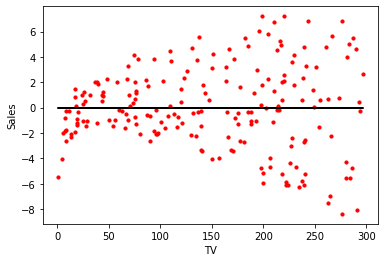

In [ ]:
yhat=results.params[1]*X['TV']+ results.params[0]
plt.scatter(X['TV'], y-yhat, c='r', s=10)
plt.plot(X['TV'], 0*y, c='k')
plt.xlabel("TV")
plt.ylabel("Sales")

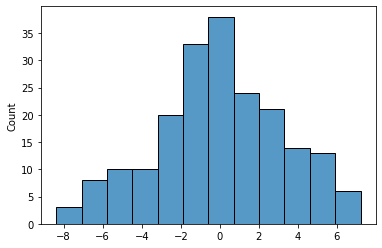

In [ ]:
import seaborn as sns
sns.histplot(results.resid)

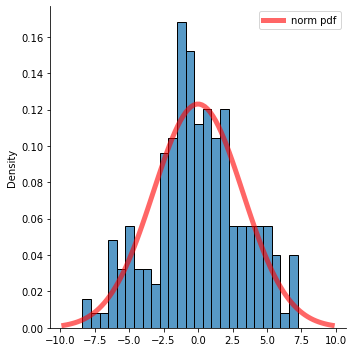

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

n = 1

data = results.resid
y = [np.mean(x) for x in data]

sns.displot(y, stat="density", bins=25)

# Plot a Gaussian PDF using sample mean and variance
sigma = np.std(y)
mu = np.mean(y)
x = np.linspace(-3 * sigma, 3 * sigma, 100)
a = 1 / math.sqrt(2 * math.pi) / sigma
x2 = -.5 * ((x - mu) / sigma)**2
y = a * np.exp(x2)
plt.plot(x, y, 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.legend();